# Telecom Churn Case Study
-----

### **Group Members:**
* Pratik Vyas
* Rajni Lal


## Business Understanding
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. Provided is data of T modnile network customers. Based on provided data it is required to predict if a customer is planning to churn or not so that Business can provide good offers to such customers. 

For this case we are concentrating on High Value customers. These are customer that bring maximum revenue to the mobile company.


In [0]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#### Load data and check its properties

In [0]:
telecom = pd.read_csv('telecom_churn_data.csv',encoding = "ISO-8859-1", low_memory=False)

In [31]:
telecom.shape

(99999, 226)

There are 226 features in data, let's look at these variable and data in whole.

In [32]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


###  Data Cleaning

#### Identifying Missing values per column and express them as % of total number of values

In [33]:
missing_values = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
missing_values.loc[missing_values> 0]

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
                        ...  
night_pck_user_9        74.08
fb_user_6               74.85
fb_user_7               74.43
fb_user_8               73.66
fb_user_9               74.08
Length: 166, dtype: float64

#### For all the columns where data has missing values imputing with 0 as these are numeric columns where 0 makes sense as these are usage or recharge columns and 0 correct values.

In [0]:
churn = telecom.fillna(0)

In [35]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [0]:
missing_values = round(100*(churn.isnull().sum()/len(churn.index)),2)

In [37]:
missing_values[missing_values > 0]

Series([], dtype: float64)

#### Now no values are missing

Handling date columns:
Below are the 12 date columns available in data. Currently they are imputed with 0. 
Last date of month columns - "last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9",
Date of Last recharge columns - "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9",
Date of Last recharge Data - "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"


### Data Preparation 

#### Calculating total recharge done in moth 6 and month 7

Checking data type of columns to be added and converting.

In [38]:
print(churn["total_rech_amt_6"].dtype)
print(churn["av_rech_amt_data_6"].dtype)

int64
float64


In [0]:
churn['total_rech_amt_6'] = churn['total_rech_amt_6'].astype('float')
churn['total_rech_amt_7'] = churn['total_rech_amt_7'].astype('float')
churn['total_rech_amt_8'] = churn['total_rech_amt_8'].astype('float')

In [0]:
churn["total_rech_mon_6"] = churn["total_rech_amt_6"] + churn["av_rech_amt_data_6"]
churn["total_rech_mon_7"] = churn["total_rech_amt_7"] + churn["av_rech_amt_data_7"]
churn["total_rech_mon_8"] = churn["total_rech_amt_8"] + churn["av_rech_amt_data_8"]

In [41]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_mon_6,total_rech_mon_7,total_rech_mon_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58,614.0,504.0,504.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00,74.0,538.0,333.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00,168.0,315.0,116.0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00,230.0,310.0,601.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00,252.0,350.0,287.0


Taking average of total_rech_mon_6 and total_rech_mon_7 to get High Value Customer

In [0]:
churn["avg_rech_amt"] = (churn["total_rech_mon_6"] + churn["total_rech_mon_7"])/2

### Filtering customers that lie above 70 percentile

In [0]:
churn_hvc = churn.loc[churn["avg_rech_amt"] > churn["avg_rech_amt"].quantile(0.7)]

In [44]:
churn_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 230 entries, mobile_number to avg_rech_amt
dtypes: float64(186), int64(32), object(12)
memory usage: 52.8+ MB


Out of 99k cutomers there are 29.9k customers that bring maximum revenue to the company and the company wants to concentrate on retaining these customers.

### Deciding base on the total minutes of usage and volumne of 2g and 3g data used in 9th month if a customer has churned or not.
Creating new feature churn in the data

In [0]:
churn_hvc["churn"] = np.where(((churn_hvc["total_ic_mou_9"] == 0) & (churn_hvc["total_og_mou_9"] == 0) 
                               & (churn_hvc["vol_2g_mb_9"] == 0)  & (churn_hvc["vol_3g_mb_9"] == 0)) , 1, 0)

Checking churn column

In [46]:
churn_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_mon_6,total_rech_mon_7,total_rech_mon_8,avg_rech_amt,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,212.17,0.0,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,614.0,504.0,504.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1580.0,790.0,3638.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,...,19.83,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00,437.0,778.0,189.0,607.5,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.0,0.00,17.74,0.00,0.0,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,570.0,348.0,160.0,459.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,600.0,680.0,718.0,640.0,0


As the churn is now decided we can delete 9th month data as it doesn't add value to prediction

In [47]:
churn_hvc_all = churn_hvc.filter(regex='[^9]$', axis=1)
churn_hvc_all.shape

(29949, 177)

### Performing EDA

Based on the details given in session arpu columns can be removed as it's detail is available in total recharge columns.
arpu columns are: 
"arpu_6","arpu_7","arpu_8","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_2g_6","arpu_2g_7","arpu_2g_8",

Apart from these Last date of month columns can be dropped as these just give last date of 6,7,8 months
columns are: "last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"

circle_id can also be dropped as it is same for all data and doesn't add any variance in data

In [0]:
drop_columns = ["arpu_6","arpu_7","arpu_8","last_date_of_month_6","last_date_of_month_7",
                "last_date_of_month_8","circle_id"]

In [0]:
churn_hvc_new = churn_hvc_all.drop(drop_columns,axis=1)

In [0]:
churn_hvc_filter = churn_hvc_all.drop(drop_columns,axis=1)

#### Visualizing data

### Univariate analysis

In [0]:
## Show labels in bar plots - referenced from https://stackoverflow.com/a/48372659 and edited
def show_Labels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

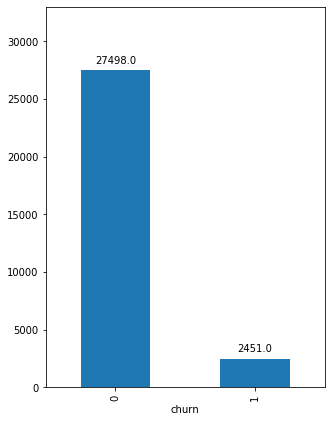

In [52]:
plt.figure(figsize=(5,7))
ax = churn_hvc_filter.groupby('churn').total_og_mou_6.count().plot.bar()
show_Labels(ax)
plt.show()

Above shows the number of churn and no churn cases. Here 1 represents churn.

### Bivariate Analysis 

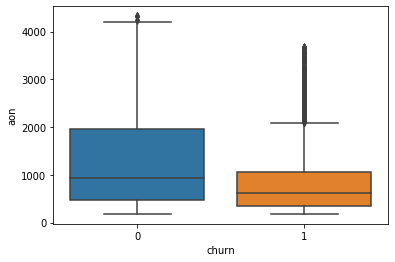

In [53]:
sns.boxplot(x='churn', y='aon', data=churn_hvc_filter)

Above shows relation between Churn and "aon" (age on network) feature. As based on the graph it seems most churn happen if aon is less.

In [0]:
corr_col = churn_hvc_filter[["onnet_mou_6","onnet_mou_7","onnet_mou_8","offnet_mou_6","offnet_mou_7","offnet_mou_8",
           "sachet_2g_6","sachet_2g_7","sachet_2g_8","sachet_3g_6","sachet_3g_7","sachet_3g_8", "aon","churn"]]

In [0]:
corr1 = corr_col.corr()

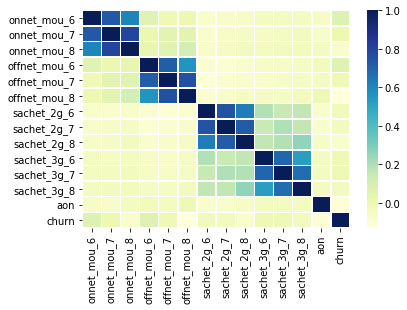

In [62]:
sns.heatmap(corr1, cmap="YlGnBu",linewidths=.5 )

Above shows that most of the variables are not impacting churn as they have very low correlation

In [63]:
corr_col = churn_hvc_filter[["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","roam_ic_mou_9","roam_og_mou_6",
                     "roam_og_mou_7","roam_og_mou_8","roam_og_mou_9","total_og_mou_6","total_og_mou_7",
                     "total_og_mou_8","total_og_mou_9","total_ic_mou_6","total_ic_mou_7",
                      "total_ic_mou_8","total_ic_mou_9","avg_rech_amt","churn"]]

KeyError: ignored

In [0]:
corr = corr_col.corr()

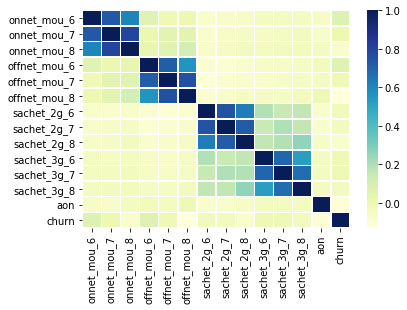

In [65]:
sns.heatmap(corr, cmap="YlGnBu",linewidths=.5)

Above fields also show very low corelation with churn.

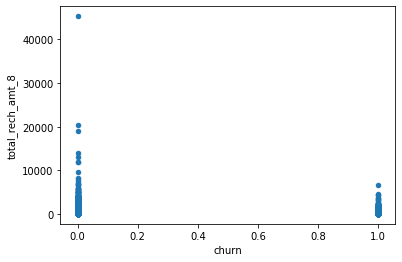

In [67]:
churn_hvc_filter.plot.scatter(x='churn', y='total_rech_amt_8')

In [0]:
corr_col = churn_hvc_filter[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']]

In [0]:
corr = corr_col.corr()

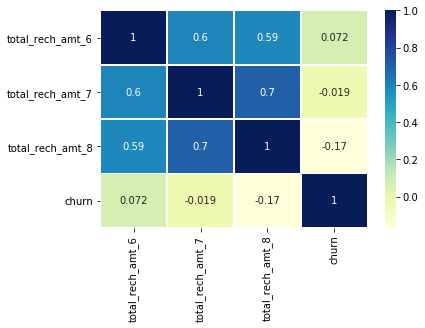

In [70]:
sns.heatmap(corr, cmap="YlGnBu",linewidths=.5, annot = True)

Above heatmap shows total_rech_amt_8 is negatively corelated with churn.

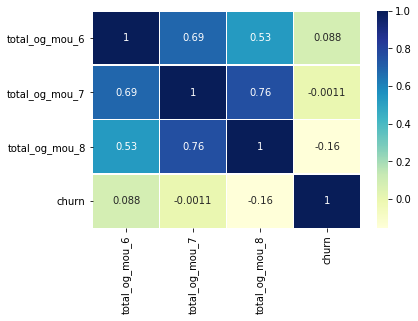

In [71]:
corr_col = churn_hvc_filter[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']]

corr = corr_col.corr()

sns.heatmap(corr, cmap="YlGnBu",linewidths=.5, annot = True)


Above heatmap shows that total outgoing minutes for month 8 is also inversely related.

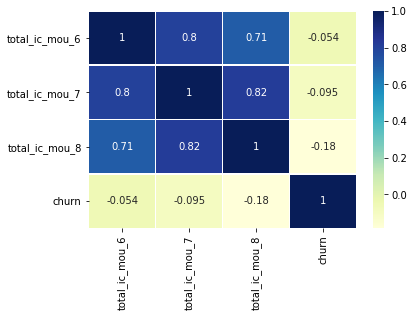

In [72]:
corr_col = churn_hvc_filter[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']]

corr = corr_col.corr()

sns.heatmap(corr, cmap="YlGnBu",linewidths=.5, annot = True)

Same is with incoming minutes for 8th month

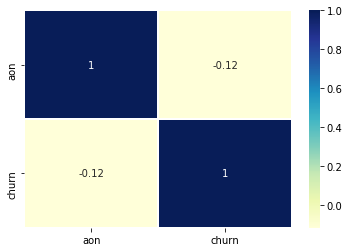

In [73]:
corr_col = churn_hvc_filter[['aon','churn']]

corr = corr_col.corr()

sns.heatmap(corr, cmap="YlGnBu",linewidths=.5, annot = True)

Age on Network is also slightly negatively corelated with churn

## Removing outliers based on IQR method

In [74]:
churn_data_IQR=churn_hvc_new

Q1 = churn_data_IQR.quantile(0.10)
Q3 = churn_data_IQR.quantile(0.90)
IQR = Q3 - Q1

print(IQR)

##  after removing outlier = inter quartile range

threshold=5

churn_data_IQR_outlier = churn_data_IQR[~((churn_data_IQR < (Q1 - threshold * IQR)) |
                                          (churn_data_IQR > (Q3 + threshold * IQR))).any(axis=1)]

print("original count " ,churn_hvc_new.shape)
print("After removing outlier"  , churn_data_IQR_outlier.shape)


mobile_number       1.906077e+06
loc_og_t2o_mou      0.000000e+00
std_og_t2o_mou      0.000000e+00
loc_ic_t2o_mou      0.000000e+00
onnet_mou_6         7.742740e+02
                        ...     
total_rech_mon_6    9.830000e+02
total_rech_mon_7    1.023000e+03
total_rech_mon_8    1.244000e+03
avg_rech_amt        8.231000e+02
churn               0.000000e+00
Length: 164, dtype: float64
original count  (29949, 170)
After removing outlier (10592, 170)


#### Outlier removal is causing about 70% data being removed so going ahead with all data for now

In [75]:
churn_hvc_new.select_dtypes(include=["object"])

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,0,0,0
8,6/25/2014,7/31/2014,8/30/2014,0,7/31/2014,8/23/2014
16,6/30/2014,7/31/2014,8/14/2014,0,0,0
21,6/30/2014,7/31/2014,8/31/2014,0,0,0
...,...,...,...,...,...,...
99984,6/21/2014,7/31/2014,8/27/2014,6/15/2014,7/31/2014,8/27/2014
99986,6/20/2014,7/28/2014,8/18/2014,6/17/2014,7/18/2014,8/14/2014
99988,6/30/2014,7/28/2014,8/29/2014,0,7/26/2014,8/23/2014
99997,6/17/2014,7/19/2014,8/20/2014,6/17/2014,7/19/2014,8/20/2014


### Modelling the data

In [0]:
# import required libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Divide data into train and test data. Taking complete data without removing outliers to check model accuracy

In [0]:
X = churn_hvc_new.drop("churn", axis = 1)
y = churn_hvc_new["churn"]
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=seed)

checking train and test data details

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20964, 169)
(8985, 169)
(20964,)
(8985,)


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 83972 to 96395
Columns: 169 entries, mobile_number to avg_rech_amt
dtypes: float64(140), int64(23), object(6)
memory usage: 27.2+ MB


There are 6 object columns, checking these columns and if they are needed:

In [80]:
X_train.select_dtypes(include=['object']).head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
83972,6/30/2014,7/30/2014,8/30/2014,0,0,0
70394,6/30/2014,7/31/2014,8/28/2014,6/30/2014,0,0
97851,6/16/2014,7/31/2014,8/26/2014,6/3/2014,7/31/2014,8/26/2014
794,6/30/2014,7/31/2014,8/30/2014,6/21/2014,0,8/29/2014
69414,6/25/2014,7/25/2014,8/29/2014,6/17/2014,7/15/2014,8/19/2014


These are all date columns and as we are not using these we will drop the date columns 
"date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_data_6", "date_of_last_rech_data_7",
"date_of_last_rech_data_8"

In [0]:
drop_date_cols = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_data_6", "date_of_last_rech_data_7",
"date_of_last_rech_data_8"]

In [0]:
X_train = X_train.drop(drop_date_cols, axis=1)

In [0]:
X_test = X_test.drop(drop_date_cols, axis=1)

In [84]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 83972 to 96395
Columns: 163 entries, mobile_number to avg_rech_amt
dtypes: float64(140), int64(23)
memory usage: 26.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8985 entries, 55195 to 84933
Columns: 163 entries, mobile_number to avg_rech_amt
dtypes: float64(140), int64(23)
memory usage: 11.2 MB


Now there are no object columns in data

Applying PCA on data

Scaling data for PCA and fitting model

In [0]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [0]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
pca_churn = pca.fit_transform(X_train)

Checking PCA model details to find relevant features

In [87]:
pca = pca.named_steps['pca']

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.34
1       19.96
2       26.60
3       31.99
4       35.80
5       39.20
6       42.05
7       44.63
8       47.04
9       49.27
10      51.35
11      53.33
12      55.18
13      56.94
14      58.63
15      60.24
16      61.79
17      63.23
18      64.63
19      66.01
20      67.35
21      68.54
22      69.71
23      70.81
24      71.88
25      72.91
26      73.87
27      74.77
28      75.61
29      76.38
30      77.15
31      77.90
32      78.63
33      79.36
34      80.06
35      80.73
36      81.35
37      81.97
38      82.57
39      83.15
40      83.73
41      84.28
42      84.82
43      85.33
44      85.82
45      86.30
46      86.77
47      87.22
48      87.67
49      88.11
50      88.53
51      88.93
52      89.32
53      89.71
54      90.08
55      90.45
56      90.79
57      91.12
58      91.44
59      91.75
60      92.06
61      92.35
62      92.64
63      92.92
64      93.20
65      93.47
66      93.73
67      93.98
68      94.23
69      94.46
70      94.68
71    

Here first 50 features can explain 90% of the variance.

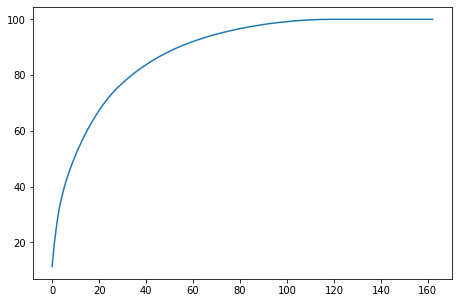

In [88]:
# Plotting variance of pca components
features = range(pca.n_components_)
variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=2)
plt.figure(figsize=(150/20,100/20))
plt.plot(variance)

## Creating Logistic Regression model with PCA

In [0]:
# create pipeline
PCA_VARS = 50
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
LR = Pipeline(steps)

In [90]:

# fitting modle
LR.fit(X_train, y_train)

# Checking accuracy score for the Logistic Regression model
LR.score(X_train, y_train)

0.8111047510017172

#### Score of LR model is coming as 82%

In [91]:
# predicting churn
y_pred = LR.predict(X_test)

# Checking confusion matrix details
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)




[[6687 1582]
 [  90  626]]


The True Negatives and True positives are high, 6687 and 626 respectively. False positives is also on higher end i.e. 1582 but as company wants to retain these High Value Customers these are ok. False negative is also low. 
Let's check sensitivity and specificity.

In [92]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))

# Let's check AUC
y_pred_prob = LR.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity:  0.87
Specificity:  0.81
AUC:  0.9


#### The AUC (Area Under Curve) value is coming as 0.9

Checking for any class imbalance

In [93]:
y_train.value_counts()/y_train.shape

0    0.917239
1    0.082761
Name: churn, dtype: float64

No Churn data makes up 91% of data while churn is only about 9% which shows a clear class imbalance.

Executing logistic regression with class imbalance adjustment

In [0]:
pca = PCA()

logistic = LogisticRegression(class_weight={1:0.08, 0: 0.92})
model = [("scaler", StandardScaler()), ("pca", pca), ("logistic", logistic)]

pca_LR = Pipeline(model)

params = {'pca__n_components': [50, 80], 
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=pca_LR, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [105]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           c...
                          

Predicting Churn on test data 

In [106]:
y_pred = model.predict(X_test)

# Checking confusion matrix details for test data
cm = confusion_matrix(y_test, y_pred)
print(cm)

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))


y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[8263    6]
 [ 706   10]]
Sensitivity:  0.01
Specificity:  1.0
AUC:  0.9


Checking Random Forest with class imbalance

In [0]:

RF = RandomForestClassifier(class_weight={0:0.9, 1: 0.1},n_jobs=-1)
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
folds = StratifiedKFold(n_splits = 5)
model = GridSearchCV(estimator=RF, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [0]:

model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
